# <center>Web Scraping & EDA on Laptop Data through Flipkart Website</center>

<img src="https://d502jbuhuh9wk.cloudfront.net/articles/65683478e4b0bd55188d8e6a/DPhyJbestlaptopsfordataanalysisunder30000inindia.jpg" 
     width="600" 
     height="400" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
url_laptop = 'https://www.flipkart.com/search?q=laptop+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page='

In [3]:
#checking url request
r1 = requests.get(url_laptop)
print(r1)

<Response [200]>


## Scraping Laptop Dataset through Flipkart Website

In [40]:
for i in range(1,2):
    url = url_laptop+str(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'lxml')
    box = soup.find('div',class_='_1YokD2 _3Mn1Gg')
    
    Laptop_Names = []
    Laptop_Prices = []
    Laptop_Ratings = []

    names = box.find_all('div',class_='_4rR01T')
    for i in names:
        n = i.text
        Laptop_Names.append(n)

    prices = box.find_all('div',class_='_30jeq3 _1_WHN1')
    for i in prices:
        n = i.text
        Laptop_Prices.append(n)

    ratings = box.find_all('div',class_='_3LWZlK')
    for i in ratings:
        n = i.text
        Laptop_Ratings.append(n)

In [41]:
# print the scraped data
print(Laptop_Names,Laptop_Prices,Laptop_Ratings)

['WINGS Nuvobook V1 Aluminium Alloy Metal Body Intel Intel Core i5 11th Gen 1155G7 - (8 GB/512 GB SSD/Wi...', 'HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/AMD Radeon RX 6...', 'DELL Inspiron 15 Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) IN35117W5CCS01ORB1 Thin an...', 'ASUS TUF Gaming F15 - AI Powered Gaming Intel Core i5 11th Gen 11260H - (8 GB/512 GB SSD/Windows 11 Ho...', 'DELL Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) New Inspiron 15 Laptop Thin and ...', 'SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1235U - (16 GB/512 GB SSD/Windows 11 Home) NP550 Thin and...', 'HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 14s-fq1092au Thin and Light Laptop', 'DELL Inspiron AMD Ryzen 7 Octa Core 5825U - (16 GB/512 GB SSD/Windows 11 Home) Vostro 5625 Notebook', 'HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144au Thin and Light Laptop', 'DELL Intel Core i5 12th Gen 12

In [42]:
#converting the data to pandas dataframe to perform EDA
df = pd.DataFrame({'Name':Laptop_Names,'Prices':Laptop_Prices,'Ratings':Laptop_Ratings})
df

,Name,Prices,Ratings
0,WINGS Nuvobook V1 Aluminium Alloy Metal Body I...,"₹34,990",4.1
1,HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/...,"₹45,990",4.3
2,DELL Inspiron 15 Intel Core i5 11th Gen - (8 G...,"₹39,990",4.1
3,ASUS TUF Gaming F15 - AI Powered Gaming Intel ...,"₹47,990",4.3
4,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,"₹35,320",4.2
5,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,"₹47,990",4.3
6,HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,"₹39,990",4.3
7,DELL Inspiron AMD Ryzen 7 Octa Core 5825U - (1...,"₹65,990",4.2
8,HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,"₹38,990",4.3
9,DELL Intel Core i5 12th Gen 1235U - (8 GB/512 ...,"₹45,290",4


In [43]:
#saving dataset into excel format 
df.to_csv('laptop_dataset.csv',index = False)

### Data Pre-Processing on Laptop Dataset

In [4]:
laptop_df = pd.read_csv('laptop_dataset.csv')
laptop_df

,Name,Prices,Ratings
0,WINGS Nuvobook V1 Aluminium Alloy Metal Body I...,"₹34,990",4.1
1,HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/...,"₹45,990",4.3
2,DELL Inspiron 15 Intel Core i5 11th Gen - (8 G...,"₹39,990",4.1
3,ASUS TUF Gaming F15 - AI Powered Gaming Intel ...,"₹47,990",4.3
4,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,"₹35,320",4.2
5,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,"₹47,990",4.3
6,HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,"₹39,990",4.3
7,DELL Inspiron AMD Ryzen 7 Octa Core 5825U - (1...,"₹65,990",4.2
8,HP AMD Ryzen 5 Hexa Core 5500U - (8 GB/512 GB ...,"₹38,990",4.3
9,DELL Intel Core i5 12th Gen 1235U - (8 GB/512 ...,"₹45,290",4.0


In [5]:
#statstical analysis
laptop_df.describe()

,Ratings
count,24.000000
mean,4.175000
std,0.125974
min,4.000000
25%,4.075000
50%,4.200000
75%,4.300000
max,4.400000


In [87]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     24 non-null     object 
 1   Prices   24 non-null     object 
 2   Ratings  24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 708.0+ bytes


In [88]:
laptop_df.shape

(24, 3)

In [89]:
# Adding new columns
laptop_df['model'],laptop_df['specs'] = laptop_df['Name'].str.split('-',1).str
del laptop_df['Name']
laptop_df.head()

C:\Users\DataTrained\AppData\Local\Temp\ipykernel_2312\1888531185.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['model'],laptop_df['specs'] = laptop_df['Name'].str.split('-',1).str
C:\Users\DataTrained\AppData\Local\Temp\ipykernel_2312\1888531185.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'],laptop_df['specs'] = laptop_df['Name'].str.split('-',1).str


,Prices,Ratings,model,specs
0,"₹34,990",4.1,WINGS Nuvobook V1 Aluminium Alloy Metal Body I...,(8 GB/512 GB SSD/Wi...
1,"₹45,990",4.3,HP Victus AMD Ryzen 5 Hexa Core 5600H,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
2,"₹39,990",4.1,DELL Inspiron 15 Intel Core i5 11th Gen,(8 GB/512 GB SSD/Windows 11 Home) IN35117W5CC...
3,"₹47,990",4.3,ASUS TUF Gaming F15,AI Powered Gaming Intel Core i5 11th Gen 1126...
4,"₹35,320",4.2,DELL Intel Core i3 12th Gen 1215U,(8 GB/512 GB SSD/Windows 11 Home) New Inspiro...


In [6]:
laptop_df['RAM'],laptop_df['HDD'] = laptop_df['specs'].str.split('(',1).str
del laptop_df['specs']
laptop_df.head()

KeyError: 'specs'

In [93]:
laptop_df['RAM'],laptop_df['Hard Disk'] = laptop_df['HDD'].str.split('/',1).str
del laptop_df['HDD']
laptop_df.head()

KeyError: 'HDD'

In [94]:
# rename columns
laptop_df.rename(columns = {'Prices':'Model_Price','Ratings':'Product_Ratings','model':'Product_Name'},inplace = True)
laptop_df.head()

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
0,"₹34,990",4.1,WINGS Nuvobook V1 Aluminium Alloy Metal Body I...,8 GB,512 GB SSD/Wi...
1,"₹45,990",4.3,HP Victus AMD Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/AMD R...
2,"₹39,990",4.1,DELL Inspiron 15 Intel Core i5 11th Gen,8 GB,512 GB SSD/Windows 11 Home) IN35117W5CCS01ORB1...
3,"₹47,990",4.3,ASUS TUF Gaming F15,8 GB,512 GB SSD/Windows 11 Ho...
4,"₹35,320",4.2,DELL Intel Core i3 12th Gen 1215U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...


In [95]:
#identifying missing values
laptop_df.isnull()

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [96]:
laptop_df.isnull().sum()

Model_Price        0
Product_Ratings    0
Product_Name       0
RAM                0
Hard Disk          0
dtype: int64

In [98]:
laptop_df['Product_Name'].nunique()

20

In [99]:
laptop_df['Product_Name'].value_counts()

HP AMD Ryzen 5 Hexa Core 5500U                                                        3
WINGS Nuvobook Pro Aluminium Alloy Metal Body Intel Intel Core i7 11th Gen 1165G7     2
WINGS Nuvobook S1 Aluminium Alloy Metal Body Intel Intel Core i3 11th Gen 1125G4      2
Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1155G7                                   1
DELL Inspiron Intel Core i5 12th Gen 1235U                                            1
WINGS Nuvobook S2 Aluminium Alloy Metal Body Intel Intel Core i3 11th Gen 1125G4      1
Acer TravelMate P2 Intel Core i7 11th Gen 1165G7                                      1
MSI Modern 14 AMD Ryzen 5 Hexa Core 7530U                                             1
HP 15s Intel Core i3 12th Gen 1215U                                                   1
HP Intel Intel Core i5 11th Gen 1155G7                                                1
WINGS Nuvobook V1 Aluminium Alloy Metal Body Intel Intel Core i5 11th Gen 1155G7      1
HP Victus AMD Ryzen 5 Hexa Core 

In [100]:
laptop_df.describe()

,Product_Ratings
count,24.000000
mean,4.175000
std,0.125974
min,4.000000
25%,4.075000
50%,4.200000
75%,4.300000
max,4.400000


In [101]:
laptop_df.dtypes

Model_Price         object
Product_Ratings    float64
Product_Name        object
RAM                 object
Hard Disk           object
dtype: object

In [102]:
laptop_df

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
0,"₹34,990",4.1,WINGS Nuvobook V1 Aluminium Alloy Metal Body I...,8 GB,512 GB SSD/Wi...
1,"₹45,990",4.3,HP Victus AMD Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/AMD R...
2,"₹39,990",4.1,DELL Inspiron 15 Intel Core i5 11th Gen,8 GB,512 GB SSD/Windows 11 Home) IN35117W5CCS01ORB1...
3,"₹47,990",4.3,ASUS TUF Gaming F15,8 GB,512 GB SSD/Windows 11 Ho...
4,"₹35,320",4.2,DELL Intel Core i3 12th Gen 1215U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...
5,"₹47,990",4.3,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) NP550 Thin and...
6,"₹39,990",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 14s-fq1092au Thin ...
7,"₹65,990",4.2,DELL Inspiron AMD Ryzen 7 Octa Core 5825U,16 GB,512 GB SSD/Windows 11 Home) Vostro 5625 Notebook
8,"₹38,990",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15s- eq2144au Thin...
9,"₹45,290",4.0,DELL Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...


## EDA on Laptop Dataset

In [110]:
# Best laptops under budget of INR 30000
laptop_df[laptop_df.Model_Price<'₹30000']

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
16,"₹29,990",4.2,WINGS Nuvobook S1 Aluminium Alloy Metal Body I...,8 GB,256 GB SSD/Wi...
17,"₹29,990",4.2,WINGS Nuvobook S1 Aluminium Alloy Metal Body I...,8 GB,256 GB SSD/Wi...


In [116]:
#Best laptops between INR 30000 and INR 40000 with Ratings greater than equals to 4.0
laptop_df[(laptop_df.Model_Price>'₹30000') & (laptop_df.Model_Price<'₹40000') & 
          (laptop_df.Product_Ratings>=4.0)]

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
0,"₹34,990",4.1,WINGS Nuvobook V1 Aluminium Alloy Metal Body I...,8 GB,512 GB SSD/Wi...
2,"₹39,990",4.1,DELL Inspiron 15 Intel Core i5 11th Gen,8 GB,512 GB SSD/Windows 11 Home) IN35117W5CCS01ORB1...
4,"₹35,320",4.2,DELL Intel Core i3 12th Gen 1215U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...
6,"₹39,990",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 14s-fq1092au Thin ...
8,"₹38,990",4.3,HP AMD Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15s- eq2144au Thin...
12,"₹39,990",4.2,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,8 GB,512 GB SSD/Windows 11 Home) 15ITL6 Thin an...
14,"₹37,999",4.2,HP 15s Intel Core i3 12th Gen 1215U,8 GB,512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin ...
18,"₹31,990",4.4,MSI Modern 14 AMD Ryzen 5 Hexa Core 7530U,8 GB,512 GB SSD/Windows 11 Home) Modern 14 C7M-063I...
20,"₹31,990",4.2,WINGS Nuvobook S2 Aluminium Alloy Metal Body I...,8 GB,512 GB SSD/Wi...


In [126]:
#Best laptops between INR 40000 and INR 50000 with Ratings greater than equals to 4.0
laptop_df[(laptop_df.Model_Price>'₹40000') & (laptop_df.Model_Price<'₹50000') & 
          (laptop_df.Product_Ratings>=4.0)]

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk
1,"₹45,990",4.3,HP Victus AMD Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/AMD R...
3,"₹47,990",4.3,ASUS TUF Gaming F15,8 GB,512 GB SSD/Windows 11 Ho...
5,"₹47,990",4.3,SAMSUNG Galaxy Book 2 Intel Core i5 12th Gen 1...,16 GB,512 GB SSD/Windows 11 Home) NP550 Thin and...
9,"₹45,290",4.0,DELL Intel Core i5 12th Gen 1235U,8 GB,512 GB SSD/Windows 11 Home) New Inspiron 15 La...
10,"₹44,990",4.0,HP Victus Gaming AMD Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
11,"₹49,990",4.0,WINGS Nuvobook Pro Aluminium Alloy Metal Body ...,16 GB,512 GB SSD/...
13,"₹46,980",4.3,HP Intel Intel Core i5 11th Gen 1155G7,8 GB,512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin...
15,"₹43,990",4.3,HP AMD Ryzen 5 Hexa Core 5500U,16 GB,512 GB SSD/Windows 11 Home) 15s- eq2182AU Thin...
19,"₹45,990",4.0,Acer TravelMate P2 Intel Core i7 11th Gen 1165G7,16 GB,1 TB SSD/Windows 11 Home) TMP214-53 Thin and...
21,"₹49,990",4.0,WINGS Nuvobook Pro Aluminium Alloy Metal Body ...,16 GB,512 GB SSD/...


In [127]:
#Best laptops between INR 40000 and INR 50000 with Ratings greater than equals to 4.0
laptop_df[(laptop_df.Model_Price>'₹50000') & (laptop_df.Model_Price<'₹60000') & 
          (laptop_df.Product_Ratings>=4.0)]

,Model_Price,Product_Ratings,Product_Name,RAM,Hard Disk


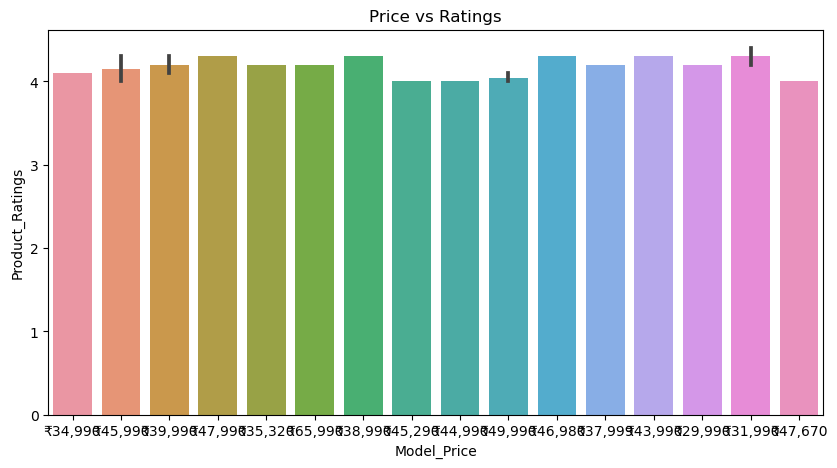

In [160]:
#Price vs Ratings
plt.figure(figsize=(10,5))
sns.barplot(x=laptop_df['Model_Price'],y=laptop_df['Product_Ratings'])
plt.title('Price vs Ratings')
plt.show()

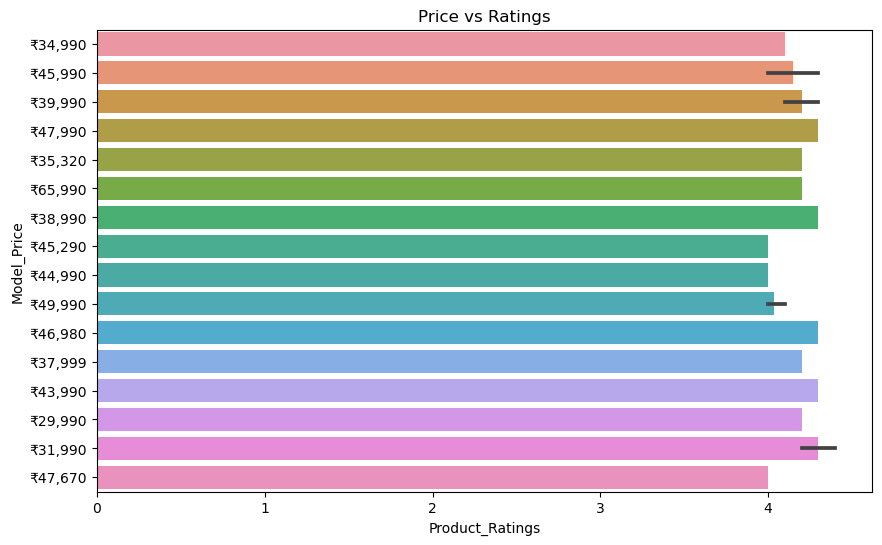

In [161]:
#Ratings vs Price
plt.figure(figsize=(10,6))
sns.barplot(x=laptop_df['Product_Ratings'],y=laptop_df['Model_Price'])
plt.title('Price vs Ratings')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

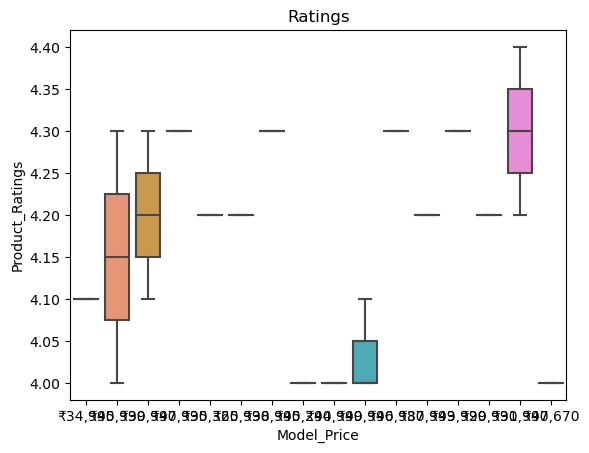

In [168]:
# pltting a box plot for ratings range
sns.boxplot(x=laptop_df['Model_Price'],y=laptop_df['Product_Ratings'])
plt.title('Ratings')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

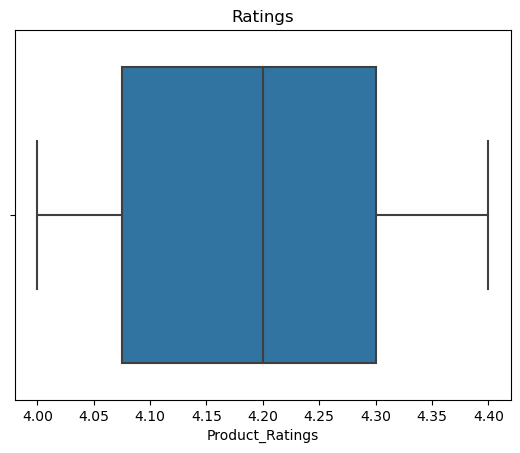

In [165]:
# pltting a box plot for ratings range
sns.boxplot(x=laptop_df['Product_Ratings'])
plt.title('Ratings')
plt.show